<div style="max-width:66ch;">

# Overfit and regularization exercises 

These are introductory exercises in Machine learning with focus in **overfitting and regularization** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task


</div>

<div style="max-width:66ch;">

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

</div>


In [157]:
#0.a)

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [158]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [159]:
df["day"]

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [160]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [161]:
#0.b)
df_describe = df[["total_bill", "tip", "size"]].describe()
df_describe

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


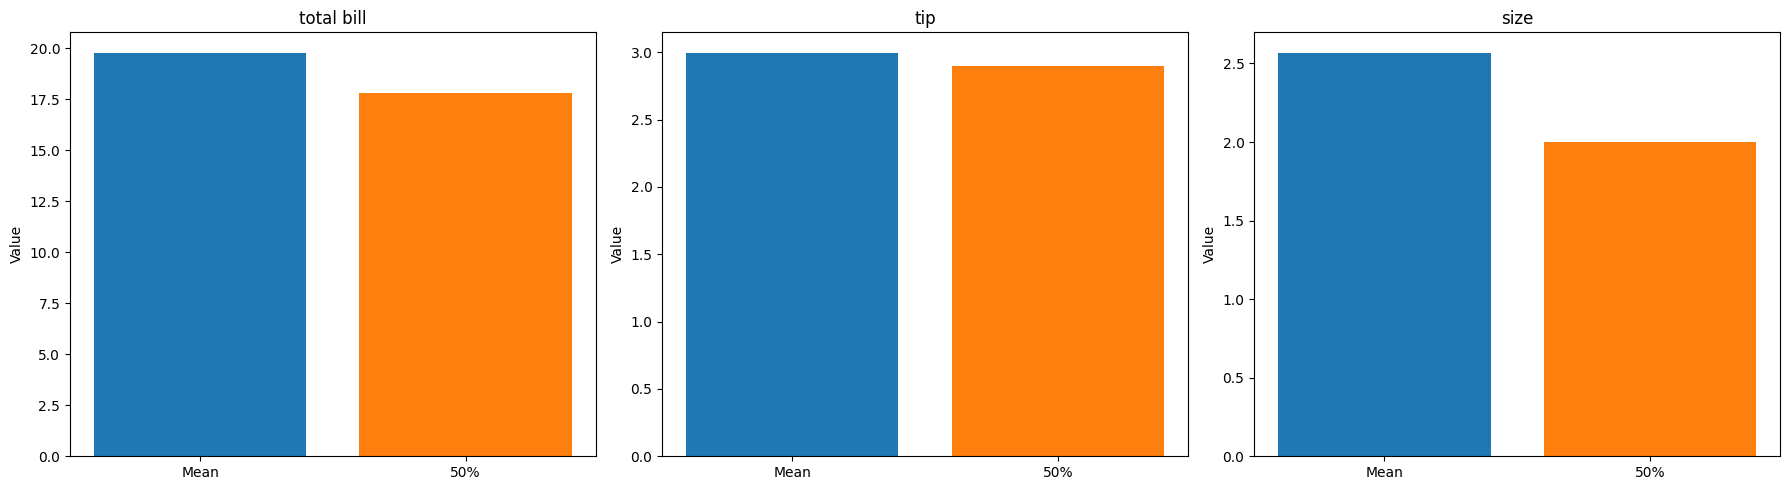

In [162]:
fig, ax = plt.subplots(1, 3, figsize= (18,5))
titles = ["total bill", "tip", "size"]

for i, col in enumerate(["total_bill", "tip", "size"]):
    ax[i].bar('Mean', df_describe.loc['mean', col])
    ax[i].bar('50%', df_describe.loc['50%', col])
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

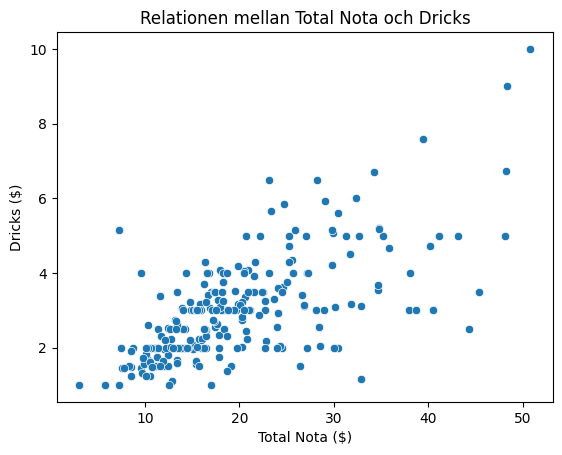

In [163]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Relationen mellan Total Nota och Dricks')
plt.xlabel('Total Nota ($)')
plt.ylabel('Dricks ($)')
plt.show()

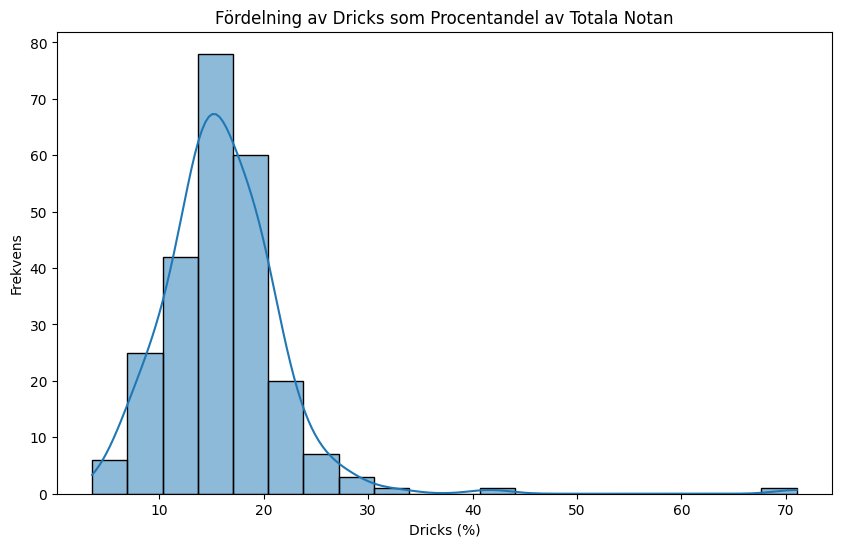

In [164]:
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100 # Beräknar dricks som en procentandel av totala notan

# Skapar ett histogram för att visa fördelningen av dricks som en procentandel av totala notan
plt.figure(figsize=(10, 6))
sns.histplot(df['tip_percentage'], bins=20, kde=True)
plt.title('Fördelning av Dricks som Procentandel av Totala Notan')
plt.xlabel('Dricks (%)')
plt.ylabel('Frekvens')

# Visar histogram
plt.show()

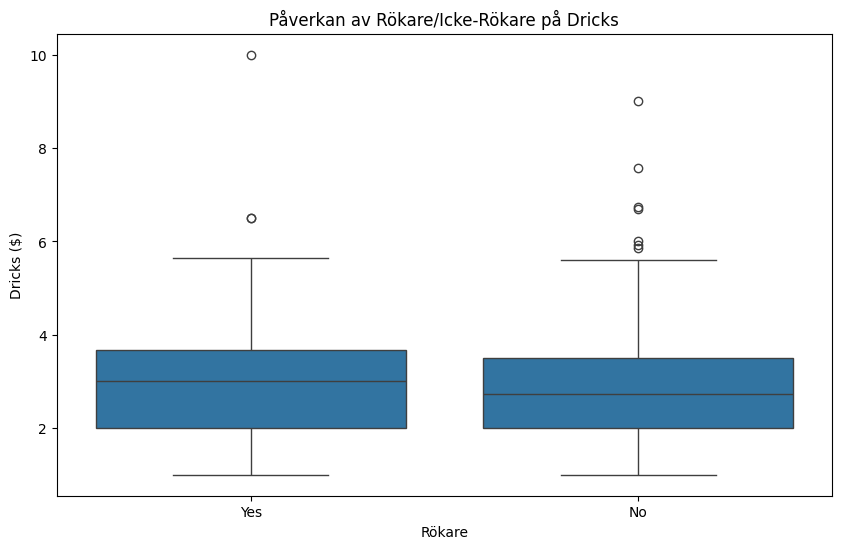

In [165]:
# lådagram för att visa påverkan av rökare/icke-rökare på dricks
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Påverkan av Rökare/Icke-Rökare på Dricks')
plt.xlabel('Rökare')
plt.ylabel('Dricks ($)')


plt.show()

1. Relationen mellan Total Nota och Dricks:

    - Vi observerade en positiv relation mellan storleken på totala notan och dricksen, vilket visades i scatter plotten. Detta indikerar att kunder tenderar att ge större dricks med högre notor. Detta är ett förväntat resultat som kan underbygga principen om procentbaserade dricks.

2. Dricks som Procentandel av Totala Notan:

    - Histogrammet visade att de flesta dricks ligger i en relativt koncentrerad procentandel av den totala notan. Detta tyder på att det finns en allmän norm eller förväntning kring hur stor del av notan som bör ges i dricks. Det kan också peka på att vissa kunder följer sociala konventioner eller interna riktlinjer för dricks.

3. Påverkan av Rökare/Icke-Rökare på Dricks:

    - Vår analys av rökare jämfört med icke-rökare gav inte tydliga bevis för stora skillnader i dricksbeteende baserat på denna faktor. Detta kan antyda att kundens rökstatus inte är en avgörande faktor för hur mycket de väljer att dricksa, eller så kan andra faktorer (som servicekvalitet eller kundens humör) spela en större roll.




<div style="max-width:66ch;">

---

## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

</div>


In [166]:
X, y = df.drop("tip", axis ="columns"), df["tip"]
X

,total_bill,sex,smoker,day,time,size,tip_percentage
0,16.99,Female,No,Sun,Dinner,2,5.944673
1,10.34,Male,No,Sun,Dinner,3,16.054159
2,21.01,Male,No,Sun,Dinner,3,16.658734
3,23.68,Male,No,Sun,Dinner,2,13.978041
4,24.59,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3,20.392697
240,27.18,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,Male,No,Sat,Dinner,2,9.820426


In [167]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [168]:
df.shape

(244, 8)

In [169]:
# 1.) split data into train and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42)

print(f"{X_train.shape =}")
print(f"{y_train.shape =}")
print(f"{X_test.shape =}")
print(f"{y_test.shape =}")

X_train.shape =(170, 7)
y_train.shape =(170,)
X_test.shape =(74, 7)
y_test.shape =(74,)


## Scikit learn steps

Steps: 
1. train|test split - some cases train|validation|test - split
2. Scale the dataset 
    - many algorithms require scaling, some don't
    - which type of scaling to use?
    - scale training data, test data to the training data, to avoid data leakage
3. Fit the algorithm to the training data
4. Transform the training data, transform the test data
5. Calculate evaluation metrics

<div style="max-width:66ch;">

---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

</div>


In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Anta att 'categorical_features' är en lista med namn på dina kategoriska kolumner
categorical_features = ['sex', 'smoker', 'day', 'time']
# Och 'numeric_features' är en lista med dina numeriska kolumner
numeric_features = X.drop(['sex', 'smoker', 'day', 'time'], axis=1).columns.tolist()

# Skapar en pipeline för kategoriska variabler
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Skapar en pipeline för numeriska variabler
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Kombinerar de två pipelines med en ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Nu kan du passa och transformera dina träningsdata
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Och bara transformera dina testdata
X_test_preprocessed = preprocessor.transform(X_test)

# Nu är 'X_train_preprocessed' och 'X_test_preprocessed' redo för maskininlärning


In [171]:
#2.)

from sklearn.preprocessing import StandardScaler

# Skapar en instans av StandardScaler
scaler = StandardScaler()

# Passar scaler till träningsdatan och transformerar den
X_train_scaled = scaler.fit_transform(X_train_preprocessed)

# Använder den passade scalern för att transformera testdatan
X_test_scaled = scaler.transform(X_test_preprocessed)

# Kontrollerar medelvärdet och standardavvikelsen för den skalade tränings- och testdatan
mean_train_scaled = X_train_scaled.mean(axis=0)
std_train_scaled = X_train_scaled.std(axis=0)
mean_test_scaled = X_test_scaled.mean(axis=0)
std_test_scaled = X_test_scaled.std(axis=0)

print("Medelvärde av skalad träningsdata (bör vara nära 0):", mean_train_scaled)
print("Standardavvikelse av skaladträningsdata (bör vara nära 1):", std_train_scaled)
print("Medelvärde av skalad testdata (bör vara nära 0):", mean_test_scaled)
print("Standardavvikelse av skalad testdata (bör vara nära 1):", std_test_scaled)


Medelvärde av skalad träningsdata (bör vara nära 0): [ 5.22457894e-18  2.02452434e-16 -2.08983158e-17  1.56737368e-17
  1.35839052e-16 -2.79514973e-16  9.14301314e-17  7.31441052e-17
  6.26949473e-17 -1.95921710e-17  5.09396447e-17 -1.69798816e-17
  1.69798816e-17]
Standardavvikelse av skaladträningsdata (bör vara nära 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Medelvärde av skalad testdata (bör vara nära 0): [-0.19194537 -0.04491163  0.0718121  -0.05581838  0.05581838  0.04795424
 -0.04795424 -0.1205106   0.06579259  0.04002336 -0.03557237  0.06949807
 -0.06949807]
Standardavvikelse av skalad testdata (bör vara nära 1): [0.92139976 1.06228803 1.53287155 0.98260173 0.98260173 0.98777806
 0.98777806 0.79723203 1.01879695 1.01593319 0.97957086 0.96446089
 0.96446089]


In [172]:
X

,total_bill,sex,smoker,day,time,size,tip_percentage
0,16.99,Female,No,Sun,Dinner,2,5.944673
1,10.34,Male,No,Sun,Dinner,3,16.054159
2,21.01,Male,No,Sun,Dinner,3,16.658734
3,23.68,Male,No,Sun,Dinner,2,13.978041
4,24.59,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3,20.392697
240,27.18,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,Male,No,Sat,Dinner,2,9.820426


<div style="max-width:66ch;">

---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 

</div>



In [173]:
X_train

,total_bill,sex,smoker,day,time,size,tip_percentage
234,15.53,Male,Yes,Sat,Dinner,2,19.317450
227,20.45,Male,No,Sat,Dinner,4,14.669927
180,34.65,Male,Yes,Sun,Dinner,4,10.620491
5,25.29,Male,No,Sun,Dinner,4,18.623962
56,38.01,Male,Yes,Sat,Dinner,4,7.892660
...,...,...,...,...,...,...,...
106,20.49,Male,Yes,Sat,Dinner,2,19.814544
14,14.83,Female,No,Sun,Dinner,2,20.364127
92,5.75,Female,Yes,Fri,Dinner,2,17.391304
179,34.63,Male,Yes,Sun,Dinner,2,10.251227


In [174]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias = True -> a column of 1s are included , and if false its excluded
# we use false as LinearRegression() handles the bias
# instansiate a PolynomialFeatures instance from the PolynomialFeatures class

poly = PolynomialFeatures(degree=2, include_bias=False)

In [175]:
# Fit the PolynomialFeatures object to X_train
poly.fit_transform(X_train_scaled)

# Transform X_train to include polynomial features
X_train_poly = poly.transform(X_train_scaled)

# Transform X_test to include polynomial features
X_test_poly = poly.transform(X_test_scaled)

poly_direct = PolynomialFeatures(degree=2, include_bias=False)
X_test_poly_direct = poly_direct.fit_transform(X_test_scaled)






In [176]:
# Check if the two arrays are identical
are_identical = np.all(X_test_poly == X_test_poly_direct)

print(f"Are the two transformed test sets identical? {are_identical}")

# Additionally, you can count how many elements are identical
identical_elements_count = np.sum(X_test_poly == X_test_poly_direct)
total_elements = X_test_poly.size  # Total elements in X_test_poly

print(f"Number of identical elements: {identical_elements_count} out of {total_elements}")

# If the number of identical elements equals the total number of elements,
# then the arrays are the same
if identical_elements_count == total_elements:
    print("The transformed test sets are exactly the same.")
else:
    print("The transformed test sets are NOT the same.")


Are the two transformed test sets identical? True
Number of identical elements: 7696 out of 7696
The transformed test sets are exactly the same.


<div style="max-width:66ch;">


---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

</div>


In [177]:
X_test_scaled

array([[-5.44530170e-02, -6.25518269e-01,  1.47916736e-02,
        -7.57676761e-01,  7.57676761e-01,  7.96627507e-01,
        -7.96627507e-01, -3.11085508e-01,  1.37162529e+00,
        -6.63835798e-01, -5.90936840e-01,  6.36363636e-01,
        -6.36363636e-01],
       [-1.27436944e+00, -6.25518269e-01,  1.33216635e+00,
        -7.57676761e-01,  7.57676761e-01,  7.96627507e-01,
        -7.96627507e-01, -3.11085508e-01, -7.29062090e-01,
         1.50639662e+00, -5.90936840e-01,  6.36363636e-01,
        -6.36363636e-01],
       [ 4.67737454e-01,  1.52272629e+00, -1.52416673e+00,
        -7.57676761e-01,  7.57676761e-01,  7.96627507e-01,
        -7.96627507e-01, -3.11085508e-01, -7.29062090e-01,
         1.50639662e+00, -5.90936840e-01,  6.36363636e-01,
        -6.36363636e-01],
       [ 6.15673020e-01,  1.52272629e+00,  7.72032771e-01,
        -7.57676761e-01,  7.57676761e-01, -1.25529183e+00,
         1.25529183e+00, -3.11085508e-01,  1.37162529e+00,
        -6.63835798e-01, -5.90936840e

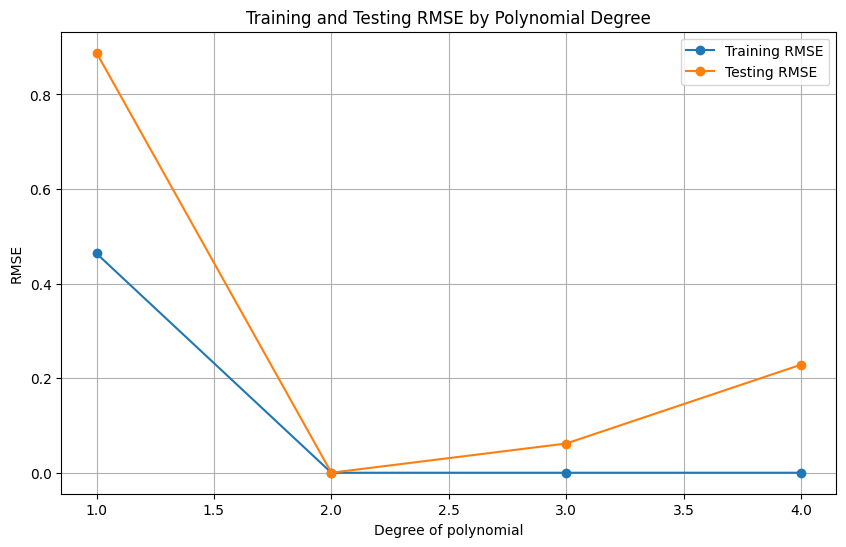

In [178]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt


train_rmse = [] # Lista för att lagra RMSE för träningsdata
test_rmse = []  # Lista för att lagra RMSE för testdata
degrees = range(1, 5) # Grader av polynom att testa

for degree in degrees:
    # Instantiera och applicera polynomfunktioner
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Utför linjär regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Förutsäg på både tränings- och testdata
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Registrera RMSE för tränings- och testdata
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse, label='Training RMSE', marker='o')
plt.plot(degrees, test_rmse, label='Testing RMSE', marker='o')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.title('Training and Testing RMSE by Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()




Den här grafen visar en tydlig trend där träningens RMSE minskar betydligt när polynomgraden ökar från 1 till 2, vilket antyder att en kvadratisk modell passar träningsdatan mycket bättre än en linjär modell. 
För testdata, minskar RMSE också när man går från grad 1 till 2, vilket indikerar att den kvadratiska modellen även generaliserar bättre.

När vi ökar graden ytterligare till 3 och 4 ser vi att RMSE för träning fortsätter att sjunka, vilket är förväntat eftersom högre grader tillåter modellen att passa träningsdatan ännu närmare. 
Däremot, för testdata, börjar RMSE öka igen efter grad 2, vilket är en indikation på att modellen börjar överanpassa: den passar träningsdata mycket väl men misslyckas med att generalisera till testdata.

Det optimala valet verkar vara polynom grad 2, där modellen uppnår en bra balans mellan att vara tillräckligt komplex för att passa datan och tillräckligt enkel för att undvika överanpassning. 
Detta understryker vikten av att använda testdata för att utvärdera modellens prestanda och inte bara lita på hur bra modellen passar träningsdatan.

<div style="max-width:66ch;">

---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

</div>

In [179]:
# 5.a)

from sklearn.linear_model import RidgeCV


# CV stands for Cross Validation

# cross validation with different alphas and score with MSE
model_ridge_CV = RidgeCV(alphas=(0.01, 0.1, 0.5, 1, 5, 10), 
                         scoring="neg_mean_squared_error") 
model_ridge_CV.fit(X_train_scaled, y_train)
model_ridge_CV.alpha_

# 1.0 bäst

1.0

In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Förutsäga på testdata med den tränade modellen
y_test_pred = model_ridge_CV.predict(X_test_scaled)

# Beräkna felen
ridge_MAE = mean_absolute_error(y_test, y_test_pred)
ridge_MSE = mean_squared_error(y_test, y_test_pred)
ridge_RMSE = np.sqrt(ridge_MSE)

# Hämta koefficienterna från den tränade modellen
ridge_coefficients = model_ridge_CV.coef_

# Skriv ut de beräknade felen och det bästa alfavärdet
print(f"The best alpha: {model_ridge_CV.alpha_}")
print(f"Ridge MAE: {ridge_MAE}")
print(f"Ridge MSE: {ridge_MSE}")
print(f"Ridge RMSE: {ridge_RMSE}")
print(f"Ridge Coefficients: {ridge_coefficients}")


The best alpha: 1.0
Ridge MAE: 0.3611729133649827
Ridge MSE: 0.7720124847006538
Ridge RMSE: 0.878642410028479
Ridge Coefficients: [ 1.26687553  0.09540542  0.99558443 -0.02658615  0.02658615  0.05911157
 -0.05911157 -0.00535559  0.01265056 -0.06883026  0.06213075  0.02251055
 -0.02251055]


- Det bästa alfa-värdet efter korsvalidering är 1.0. Detta värde används som en regulariseringsstyrka i Ridge-regressionen för att balansera mellan att passa modellen till datan och hålla vikterna (koefficienterna) små för att undvika överanpassning.

- MAE (Mean Absolute Error) är 0.3612, vilket anger det genomsnittliga absoluta felet mellan förutsägelserna och de faktiska värdena. Ett lägre värde är att föredra och det här värdet ger en indikation på hur stora fel du kan förvänta dig från modellen i genomsnitt.

- MSE (Mean Squared Error) är 0.7720, vilket är genomsnittet av kvadraten på felen. MSE är känslig för utliggare eftersom fel kvadreras och större fel har en överdrivet stor inverkan på MSE.

- RMSE (Root Mean Squared Error) är 0.8786, vilket är kvadratroten av MSE. RMSE är en bra måttstock för att förstå felets storlek i samma enheter som responsvariabeln och anses ofta vara en av de mest relevanta mätvärdena för att bedöma passformens kvalitet.

- Koefficienterna representerar vikten av varje polynomfunktion i den slutliga modellen. De indikerar storleken och riktningen på sambandet mellan varje oberoende variabel och den beroende variabeln. Notera att koefficienter nära noll har en liten eller ingen inverkan på den beroende variabeln, medan större absolutvärden indikerar starkare samband.

In [181]:
# 5.b)

from sklearn.linear_model import LassoCV

model_lasso_CV = LassoCV(eps = 0.001, n_alphas = 100, max_iter=int(1e4), cv=5)
model_lasso_CV.fit(X_train_scaled, y_train)
model_lasso_CV.alpha_

0.0032298808765544376

In [182]:
model_lasso_CV.coef_

array([ 1.28054375e+00,  8.56424015e-02,  1.00001379e+00, -4.83394448e-02,
        8.48994078e-18,  1.18788657e-01, -0.00000000e+00, -1.93931135e-02,
        0.00000000e+00, -7.65849980e-02,  1.21141663e-02,  4.30869183e-03,
       -1.63268092e-17])

In [183]:
# Förutsäga på testdata med den tränade modellen
y_test_pred = model_lasso_CV.predict(X_test_scaled)

# Beräkna felen
lasso_MAE = mean_absolute_error(y_test, y_test_pred)
lasso_MSE = mean_squared_error(y_test, y_test_pred)
lasso_RMSE = np.sqrt(lasso_MSE)

# Hämta koefficienterna från den tränade modellen
lasso_coefficients = model_lasso_CV.coef_

# Skriv ut de beräknade felen och det bästa alfavärdet
print(f"The best alpha: {model_lasso_CV.alpha_}")
print(f"lasso MAE: {lasso_MAE}")
print(f"lasso MSE: {lasso_MSE}")
print(f"lasso RMSE: {lasso_RMSE}")
print(f"lasso Coefficients: {lasso_coefficients}")


The best alpha: 0.0032298808765544376
lasso MAE: 0.3595262814648219
lasso MSE: 0.7773782211812079
lasso RMSE: 0.8816905472903789
lasso Coefficients: [ 1.28054375e+00  8.56424015e-02  1.00001379e+00 -4.83394448e-02
  8.48994078e-18  1.18788657e-01 -0.00000000e+00 -1.93931135e-02
  0.00000000e+00 -7.65849980e-02  1.21141663e-02  4.30869183e-03
 -1.63268092e-17]


<div style="width: 66ch;">


</div>

In [184]:
# 5.c)

from sklearn.linear_model import ElasticNetCV

model_elastic = ElasticNetCV(
    l1_ratio=[0.001, 0.01, 0.05, 0.1, 0.9, 0.95, 1],
    eps=0.001,
    n_alphas=100,
    max_iter=int(1e4),
)

model_elastic.fit(X_train_scaled, y_train)
model_elastic.alpha_

0.0032298808765544376

In [185]:
# l1 = 1 means only l1 (lasso) not l2
# l1_ratio = 0 means ridge l2
# l1_ratio = between 0 - 1 means mix of l1 and l2
model_elastic.l1_ratio_

1.0

In [186]:
# Förutsäga på testdata med den tränade modellen
y_test_pred = model_elastic.predict(X_test_scaled)

# Beräkna felen
elastic_MAE = mean_absolute_error(y_test, y_test_pred)
elastic_MSE = mean_squared_error(y_test, y_test_pred)
elastic_RMSE = np.sqrt(elastic_MSE)

# Hämta koefficienterna från den tränade modellen
elastic_coefficients = model_elastic.coef_

# Skriv ut de beräknade felen och det bästa alfavärdet
print(f"The best alpha: {model_elastic.alpha_}")
print(f"elastic MAE: {elastic_MAE}")
print(f"elastic MSE: {elastic_MSE}")
print(f"elastic RMSE: {elastic_RMSE}")
print(f"elastic Coefficients: {lasso_coefficients}")

The best alpha: 0.0032298808765544376
elastic MAE: 0.3595262814648219
elastic MSE: 0.7773782211812079
elastic RMSE: 0.8816905472903789
elastic Coefficients: [ 1.28054375e+00  8.56424015e-02  1.00001379e+00 -4.83394448e-02
  8.48994078e-18  1.18788657e-01 -0.00000000e+00 -1.93931135e-02
  0.00000000e+00 -7.65849980e-02  1.21141663e-02  4.30869183e-03
 -1.63268092e-17]


Det verkar som att du har framgångsrikt tränat en ElasticNet-modell med korsvalidering och hittat de bästa hyperparametrarna för din datamängd. Du har identifierat alpha_ som 0.0032298808765544376 och l1_ratio_ som 1.0. Eftersom l1_ratio_ är 1.0, betyder det att modellen enbart använde L1-regularisering, vilket är ekvivalent med Lasso-regression. Detta innebär att vissa koefficienter kan ha satts till exakt noll, vilket indikerar att motsvarande features inte bidrar till modellens förutsägelser.

De beräknade felen och koefficienterna du har tillhandahållit är:

Best Alpha: Det bästa värdet för regulariseringsparametern alfa.
- MAE (Mean Absolute Error): Genomsnittligt absolut fel mellan förutsägelserna och de faktiska värdena.
- MSE (Mean Squared Error): Medelvärdet av kvadraten av felen.
- RMSE (Root Mean Squared Error): Kvadratroten av medelvärdet av kvadraten av felen.
- Coefficients: Vikterna som modellen har tilldelat varje feature.
Den sista raden i din utskrift, print(f"elastic Coefficients: {lasso_coefficients}"), verkar referera till en variabel lasso_coefficients som inte har definierats i koden du skickade. Antagligen skulle det vara elastic_coefficients istället för lasso_coefficients.

Resultaten visar att modellen har liknande prestanda som den tidigare Ridge-modellen, med MAE och RMSE värden som är jämförbara. Att l1_ratio_ är 1.0 betyder att modellen favoriserade en sparsam modell, där en del features helt kunde uteslutas (dvs. deras koefficienter sattes till noll).

När du arbetar med regulariseringsmodeller, speciellt de som kan ge sparsamma lösningar som Lasso och ElasticNet med l1_ratio_ nära 1, är det en bra idé att också undersöka vilka features som har uteslutits och överväga om detta stämmer överens med din domänkunskap och förväntningar.








<div style="background-color: #FFF; color: #212121; border-radius: 20px; width:25ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1em; width: 60%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
    <div>
</div>